# State Transition Matrix

## Given:
Earth-Moon system and position and velocity.
$$\vec{r} = 0.488 \hat{x} + 0.2 \hat{y}$$
$$\vec{v} = -0.88\hat{x} + 0.2\hat{y}$$

## Find:
a) The IC in dimensional units

b) i. Simulate trajectory until it crosses the x-axis. Include a 4x4 $\phi$. Time dimensional and non-dimensional? $\phi$ at $t_f$

ii. Check $\phi_{13}$, $\phi_{23}$, $\phi_{42}$, and $\phi_{14}$. Use these this to predict the final state. Estimate the change in $x_f$ as a result of +1% $\dot{y}_0$ in km/s

c) Define $\delta \vec{r}_0 = \begin{pmatrix} \delta x_0 \\ \delta y_0 \end{pmatrix}$ and $\delta \vec{v}_0 = \begin{pmatrix} \delta \dot{x}_0 \\ \delta \dot{y}_0 \end{pmatrix}$. Change IC to investgate input. 

i) Case 1 is:
$$ \delta x_0 = 1\% \text{ of } x_0 $$

$$\delta y_0 = \delta \dot{x}_0 = \delta \dot{y}_0 = \delta \dot{t}_f = 0$$

ii) Case 2 is:
$$ \delta \dot{y}_0 = 1 \% \text{ of } \dot{y}_0 $$

$$\delta x_0 = \delta y_0 = \delta \dot{x}_0 = \delta \dot{t}_f = 0$$


In [8]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_3 as SS3
from Functions import Keplarian_fnc as kp
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [9]:
r_vec = np.array([0.488, 0.2, 0])
v_vec = np.array([-0.88, 0.2, 0])

system = "Earth-Moon"

## Part a)

In [4]:
r_vec_dim = pn.L_2_dim(r_vec, SS3.loc[system, 'l*'])
v_vec_dim = v_vec * SS3.loc[system, 'l*']/ SS3.loc[system, 't*']

print('Starting position in the rotating frame (km): ', r_vec_dim)
print('Starting velocity in the rotating frame (km/s): ', v_vec_dim)

Starting position in the rotating frame (km):  [187587.2  76880.       0. ]
Starting velocity in the rotating frame (km/s):  [-0.90160123  0.20490937  0.        ]


### Part b)

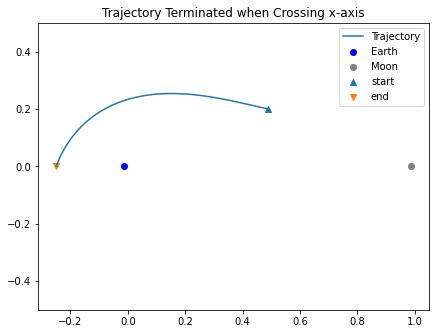

In [5]:
IC = np.append(r_vec, v_vec)
IC = np.append(IC,  np.eye(6).reshape((36,)))
t_span = [0, 10]

def event(t,x):
    return x[1]

event.direction = 0
event.terminal = True

traj = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45', 
                 rtol=10**-12, atol=10**-16, events=event)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.plot(traj.y[0,:], traj.y[1,:], label='Trajectory')
axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.scatter(traj.y[0,0], traj.y[1,0], marker='^', label="start")
axs.scatter(traj.y[0,-1], traj.y[1,-1], marker='v', label="end")
axs.set_ylim([-.5,.5])
axs.set_aspect('equal', 'box')
axs.set_title('Trajectory Terminated when Crossing x-axis')
axs.legend()

phi = traj.y[6:,-1].reshape((6,6))
phi_2d = phi[[0,1,3,4], :][:, [0,1,3,4]]

col_name = ['x_0','y_0','x_dot_0', 'y_dot_0']
row_name = ['x_f','y_f','x_dot_f', 'y_dot_f']
df_phi_2d = pd.DataFrame(phi_2d, columns=col_name, index=row_name)

t_end = traj.t[-1]

In [6]:
delta = [0,0,0,0.01]
x_f_phi = traj.y[0,-1] + np.dot(df_phi_2d.loc['x_f'],delta)

IC = np.append(r_vec, v_vec) + [0, 0, 0, 0, 0.01, 0]
IC = np.append(IC,  np.eye(6).reshape((36,)))

t_span = [0, t_end]

traj2 = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45', 
                 rtol=10**-12, atol=10**-16)

print('Change x final due to change in intial velocity determined by phi', round(x_f_phi,4))
print('Change x final due to change in intial velocity integration', round(traj2.y[0,-1],4))

Change x final due to change in intial velocity determined by phi -0.2509
Change x final due to change in intial velocity integration -0.2506


### Part c)

In [24]:
delta = np.array([0.01, 0, 0, 0, 0, 0])
x_f_phi = traj.y[:6,-1] + phi @ delta

IC = np.append(r_vec, v_vec) + delta
IC = np.append(IC,  np.eye(6).reshape((36,)))

traj2 = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45', 
                 rtol=10**-12, atol=10**-16)

print('Change in final Position: ')
print('Change final postions due to change in intial position determined by phi', 
      np.round(pn.L_2_dim(x_f_phi[:3],SS3.loc[system,'l*'])))
print('Change final postions due to change in intial position integration', 
      np.round(traj2.y[:3,-1]*SS3.loc[system,'l*']))

print('\nChange in final Velocity: ')
print('Due to change in intial position determined by phi', 
      np.round(pn.L_2_dim(x_f_phi[3:6],SS3.loc[system,'l*'])/SS3.loc[system,'l*'], 3))
print('Due to change in intial position integration', 
      np.round(traj2.y[3:6,-1]*SS3.loc[system,'l*']/SS3.loc[system,'t*'], 3))


Change in final Position: 
Change final postions due to change in intial velocity determined by phi [-95580.  16160.      0.]
Change final postions due to change in intial velocity integration [-94566.  15914.      0.]

Change in final Velocity: 
Due to change in intial velocity determined by phi [-1.075 -2.058  0.   ]
Due to change in intial velocity integration [-1.091 -2.085  0.   ]


In [25]:
delta = np.array([0, 0, 0, 0, 0.01, 0])
x_f_phi = traj.y[:6,-1] + phi @ delta

IC = np.append(r_vec, v_vec) + delta
IC = np.append(IC,  np.eye(6).reshape((36,)))

traj2 = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45', 
                 rtol=10**-12, atol=10**-16)

print('Change in final Position: ')
print('Change final postions due to change in intial velocity determined by phi', 
      np.round(pn.L_2_dim(x_f_phi[:3],SS3.loc[system,'l*'])))
print('Change final postions due to change in intial velocity integration', 
      np.round(traj2.y[:3,-1]*SS3.loc[system,'l*']))

print('\nChange in final Velocity: ')
print('Due to change in intial velocity determined by phi', 
      np.round(pn.L_2_dim(x_f_phi[3:6],SS3.loc[system,'l*'])/SS3.loc[system,'l*'], 3))
print('Due to change in intial velocity integration', 
      np.round(traj2.y[3:6,-1]*SS3.loc[system,'l*']/SS3.loc[system,'t*'], 3))


Change in final Position: 
Change final postions due to change in intial velocity determined by phi [-96430.   5421.      0.]
Change final postions due to change in intial velocity integration [-96330.   5403.      0.]

Change in final Velocity: 
Due to change in intial velocity determined by phi [-0.888 -2.099  0.   ]
Due to change in intial velocity integration [-0.908 -2.148  0.   ]
